In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [440]:
def alt_rot_sym(arr):
    arr = np.asarray(arr)
    n = len(arr)
    arr = (arr - arr[0]) % 360 # aligning so that first point is on x-axis (angle of zero)
    arr = np.asarray([arr[i] - 360*(i)/n for i in range(n)]) % 360
    return np.mean(2 - 2 * np.cos(np.radians(arr)))

In [441]:
def rot_sym(arr):
    arr = np.asarray(arr)
    n = len(arr)
    theta = np.diff(np.append(arr, arr[0])) % (360)
#     print(theta)
    dot_prod = [] 
    for i in range(1, n):       
        r_theta = np.roll(arr, i)
        r_theta = np.append(r_theta, r_theta[0])
        r_theta = np.diff(r_theta) % 360
        dot_prod.append(np.dot(r_theta/np.linalg.norm(r_theta), theta/np.linalg.norm(theta)))
#         dot_prod.append(np.sum(r_theta/np.linalg.norm(r_theta) == theta/np.linalg.norm(theta))a
        print(r_theta, dot_prod[-1])
    return np.mean(dot_prod)

In [472]:
n_s = 100
angles_a = np.linspace(start=10, stop=360, num=n_s)
dps = np.zeros((n_s,))
for i in range(n_s):
    arr = np.asarray([0, angles_a[i]])
    dps[i] = alt_rot_sym(arr)

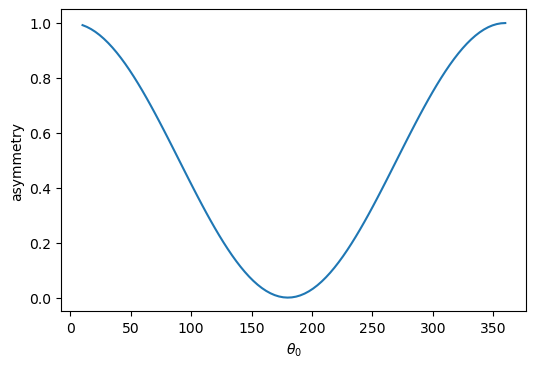

In [477]:
f = plt.figure(dpi=100)
plt.plot(angles_a, dps/np.amax(dps))
# plt.xticks(angles_a)
plt.xlabel('$\\theta_0$')
plt.ylabel('asymmetry')
plt.show()

In [401]:
n_s = int(170/2)
angles_a = np.linspace(start=10, stop=180, endpoint=False, num=n_s)
angles_a

array([ 10.,  12.,  14.,  16.,  18.,  20.,  22.,  24.,  26.,  28.,  30.,
        32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,  48.,  50.,  52.,
        54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,  72.,  74.,
        76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,
        98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118.,
       120., 122., 124., 126., 128., 130., 132., 134., 136., 138., 140.,
       142., 144., 146., 148., 150., 152., 154., 156., 158., 160., 162.,
       164., 166., 168., 170., 172., 174., 176., 178.])

In [463]:
n_s = int(170)
angles_a = np.linspace(start=10, stop=180, endpoint=False, num=n_s)
angles_b = np.linspace(start=10, stop=180, endpoint=False, num=n_s)
dps = np.zeros((n_s, n_s))
for i in range(n_s):
    for j in range(n_s):
        arr = np.asarray([0, angles_a[i], (angles_a[i] + angles_b[j]) % 360])
        dps[i, j] = alt_rot_sym(arr)

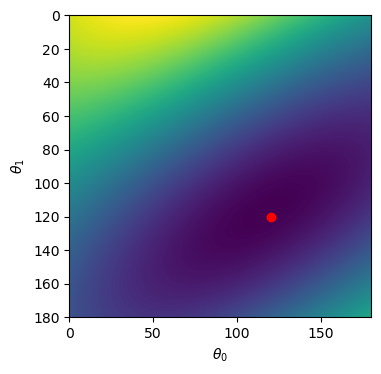

In [470]:
f = plt.figure(dpi=100)
plt.imshow(dps, extent=[0, 180, 180, 0])
x, y = np.unravel_index(np.argmin(dps), shape=dps.shape) 
# plt.axvline(x=120, color='red')
# plt.axhline(y=120, color='red')
plt.scatter(x=120, y=120, color='red')
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')
plt.show()

In [449]:
n_s = 85
angles_a = np.linspace(start=10, stop=180, endpoint=False, num=n_s)
angles_b = np.linspace(start=10, stop=180, endpoint=False, num=n_s)
angles_c = np.linspace(start=10, stop=180, endpoint=False, num=n_s)
dps = np.zeros((n_s, n_s, n_s))
for i in range(n_s):
    for j in range(n_s):
        for k in range(n_s):
            arr = np.asarray([0, angles_a[i], (angles_a[i] + angles_b[j]) % 360, (angles_a[i] + angles_b[j] + angles_c[k]) % 360])
            dps[i, j, k] = alt_rot_sym(arr)

160.0 90.0


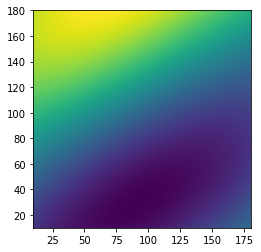

In [460]:
plt.imshow(np.squeeze(dps[np.flatnonzero(angles_a == 20), :, :]), extent=[10, 180, 10, 180])
x, y=np.unravel_index(np.argmin(dps[np.flatnonzero(angles_a == 20), :, :]), shape=dps.shape[1:])
print(angles_b[x], angles_c[y])
plt.show()

In [461]:
0, 20, 180, 180+90

(0, 20, 180, 270)